# Gas Discharge & Stellar Feedback-driven Outflows (Part 2 / 2):
## Scaling, Fractional Heating, Accretion
`-- Leo Lonzarich, 31 October 2021 // [Updated 7-11-21] --`


### Table of Contents
- [Analysing Discharged Gas](#compare)
    - [Radial Position Scaling](#radialpositions)
    - [Radial Velocity Scaling](#velocities)
- [Fractional Heating](#fractional)
    - [Fraction SNe-Heated](#fractionsne)
    - [Fraction Ram Pressure-stripped](#fractionram)
- [Accretion of Discharged Gas](#accretion)
- [The Proving Grounds](#proving)


### General Comments on the Contents of this Noteboook
- Repeated pids that turn up in the data sets below (e.g. 'ejected,' 'expelled,' 'discharged') should mean that the same particle has been accreted and reejected more than once --- hence its reoccurance in the set.


- While each root data set is defined where used, definitions are included here for convenience:
    - *Ejected*: All gas partiles that have been removed from their respective satellite galaxy's disk and into the halo.
    - *Expelled*: All gas particles (either within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas that has been completely removed from its respective satellite.
    - *Discharged*: All gas that has been removed from the disk of its respective satellite galaxy. This includes gas both moved to the halo and beyond the virial radius.
    - *predischarged*: This is essentially a data set containing the pre-properties of the discharged gas, that is, it contains all of those gas particles in the *discharged* set but with their properties before being discharged.
    - *dsrg_accreted*: **fill in**
    
    
- Units for key values used in this notebook:
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kiloparsecs per year $(kpc \ yr^{-1})$.
    - *Masses* in Solar masses $(Msol)$.

In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 

In [2]:
path = '/home/lonzaric/astro_research/Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), 'Available Keys:', *keys)

19 Available Keys: h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


## The 'Discharged' Gas: Comparing Heated Vs. All <a class="anchor" id="compare"></a>

____
____

Here we commit to a similar treatment performed in *Stellar_Feedback_p1* where 'all' and 'heated' discharged gas divisions were compared. However, where we diverge here is that we scale radial positions of gas particles by the radius of their respective satellite galaxy's radius. That is, for each particle, we will have
$$
r_{eff} = r/R_{disk}
$$
for each particle, where $r_{eff}$ is the effective radius, $r$ is the radial position, and $R_{disk}$ is the radius of the relevant satellite's disk. Similarly, for velocities we commit to two different scalings
$$
v_{eff} = v/v_{vir} \text{  and  } v_{eff} = v/v_{esc} 
$$
where $v$ is the radial velocity, $v_{vir}$ is the satellite's virial velocity, and $v_{esc}$ is the escape velocity for the particle.

### Radial Position Scaling <a class="anchor" id="radialpositions"></a>

We begin by applying the scaling above for radial positions.


In [9]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [10]:
len(predischarged), len(discharged), len(accreted), len(preheated), len(heated)

(241104, 241104, 194090, 76535, 76535)

len(predischarged), len(discharged), len(accreted), len(preheated), len(heated): pre tracked particles update.

(241104, 241104, 194090, 15229, 15229)

After updating with `Mvir`:

(241104, 241104, 194090, 76535, 76535)

In [6]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

In [7]:
# data has precalculated key 'r_per_Rvir' that we will use for our position computations; we unpack it here.

pre_rR = predischarged.r_per_Rvir
all_rR = discharged.r_per_Rvir
acc_rR = accreted.r_per_Rvir
preheat_rR = preheated.r_per_Rvir
hot_rR = heated.r_per_Rvir

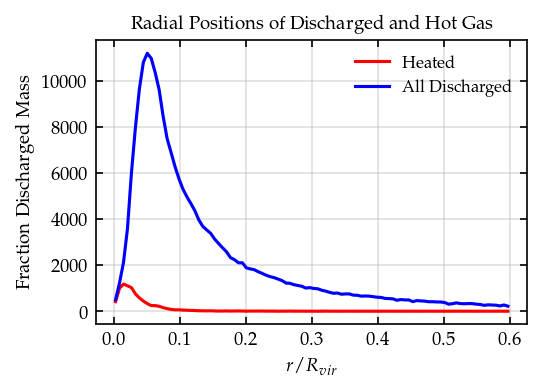

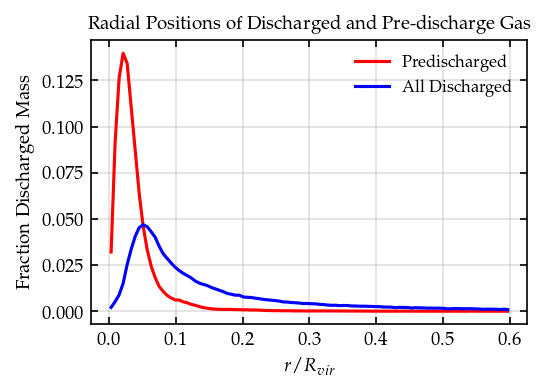

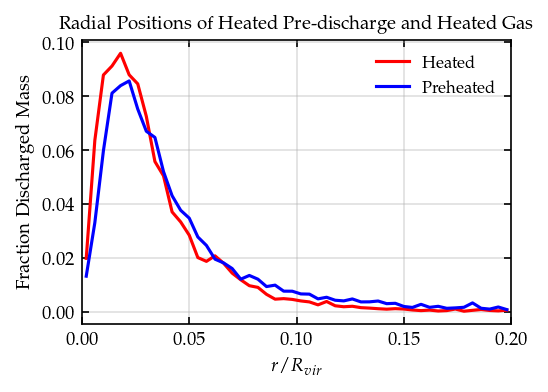

In [10]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_rR, bins=bins, range=(0, 0.6))
# y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_rR, bins=bins, range=(0, 0.6))
# y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'$r/R_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(0,1)
# ax.set_ylim(0,0.25)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_rR, bins=bins, weights=predischarged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Predischarged', c='r')

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'$r/R_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(0,1)
# ax.set_ylim(0,0.25)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 50
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1_hot, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0, 0.2))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1_hot, label='Heated', c='r')

# preheated
y1, x = np.histogram(preheat_rR, bins=bins, weights=preheated.weight, range=(0, 0.2))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Preheated', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'$r/R_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,0.2)
# ax.set_ylim(0,0.25)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

In [11]:
len(heated)

8367

So, the first two plots above essentially echo what we have already seen in `StellarFeedback_p1`. However, this third plot is on initial viewing, suspicious. It would appear that the radial positions for hot gas before discharge nearly match those for this gas after being discharged.

In [7]:
print('The minimum preheated ratio is', preheat_rR.min(), 'and the minimum heated ratio is ', hot_rR.min())

The minimum preheated ratio is 0.0002051885167676295 and the minimum heated ratio is  0.0005076476118961308


So on viewing the stats on these two datasets, things would appear to be in order. Nonetheless, it is interesting to find that SNe-heated gas is discharged, on the average, only very short distances.


### Comparing Radial Velocities ($v_{vir}$)<a class="anchor" id="velocities"></a>

We first start scaling velocities according to $v_{eff} = v/v_{vir}$. Recall that the virial -- or circular -- velocity of a halo is defined by 
$$
    v_{vir} \equiv \sqrt{ \frac{G \cdot M_{vir}}{ r_{vir} } }.
$$
Thus, we use the gravitational constant $G$ as found previously and the keys `satMvir` and `satRvir` to compute the $v_{vir}$ for every gas particle's respective satellite.

In [346]:
discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'angle', 'key', 'weight'],
      dtype='object')

In [ ]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radvel, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

The radial centers of mass are again included to better detail the velocity at which the bulk of each gas group is traveling.

All particles are moving out/into the the center of the satellites nearly uniformly, with slight bias towards exiting, as we should expect.

The second plot is particcularly telling of the validity in data collection --- that is, the bulk of gas, before being discharged, has a radial velocity of 0 $km/s$ relative to the center of the satellite galaxies.

### Comparing Radial Velocities ($v_{esc}$)<a class="anchor" id="velocities"></a>

We first start scaling velocities according to $v_{eff} = v/v_{esc}$, where we can calculate the escape velocity for each particle by the familiar relation
$$
v_{esc} = \sqrt{\frac{2GM}{r}},
$$
where $G$ is the gravitational constant, $M$ is the mass contained within $R_{vir}$ of the respective satellite, and $r$ is the radial position of the particle.

In [45]:
discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'angle', 'key', 'weight',
       'Ve'],
      dtype='object')

In [12]:
# computing escape velocity key for each discharge dataset.

# grav constant in units of kpc**3 Msol**-1 yr**-2.
G = 4.53943e10-24

predischarged['Ve'] = np.sqrt(2 * G * predischarged.sat_Mgas / predischarged.r)
discharged['Ve'] = np.sqrt(2 * G * discharged.sat_Mgas / discharged.r)
accreted['Ve'] = np.sqrt(2 * G * accreted.sat_Mgas / accreted.r)
preheated['Ve'] = np.sqrt(2 * G * preheated.sat_Mgas / preheated.r)
heated['Ve'] = np.sqrt(2 * G * heated.sat_Mgas / heated.r)

In [13]:
# effective velocities using the above keys.
pre_veff = predischarged.v / predischarged.Ve
all_veff = discharged.v / discharged.Ve
acc_veff = accreted.v / accreted.Ve
preheat_veff = preheated.v / preheated.Ve
hot_veff = heated.v / heated.Ve

In [21]:
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))


In [29]:
all_veff.max()

inf

In [1]:
# consolidating cartesian position & velocity components for every gas particle relative to its respective satellite.
predischarged_pos = np.array([predischarged.x, predischarged.y, predischarged.z]).T
predischarged_vel = np.array([predischarged.vx, predischarged.vy, predischarged.vz]).T

# for gas that was SNe-heated.
hot_predischarged_pos = np.array([hot_predischarged.x, hot_predischarged.y, hot_predischarged.z]).T
hot_predischarged_vel = np.array([hot_predischarged.vx, hot_predischarged.vy, hot_predischarged.vz]).T

# for gas after being discharged from its satellite.
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_vel = np.array([discharged.vx, discharged.vy, discharged.vz]).T

# repeating the above for SNe-heated gas in particular.
hot_pos = np.array([heated.x, heated.y, heated.z]).T
hot_vel = np.array([heated.vx, heated.vy, heated.vz]).T

# for discharged gas after being accreted back onto its satellite.
accreted_pos = np.array([accreted.x, accreted.y, accreted.z]).T
accreted_vel = np.array([accreted.vx, accreted.vy, accreted.vz]).T


# calculating radial positions of hot/all discharged gas.
pre_radpos = np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radpos = np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radpos = np.sqrt(np.sum(hot_pos**2, axis=1))
accreted_radpos = np.sqrt(np.sum(accreted_pos**2, axis=1))

# computing radial velocities for hot/all discharged gas particles.
pre_radvel = np.sum(predischarged_pos * predischarged_vel, axis=1) / np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radvel = np.sum(hot_predischarged_pos * hot_predischarged_vel, axis=1) / np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radvel = np.sum(discharged_pos * discharged_vel, axis=1) / np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radvel = np.sum(hot_pos * hot_vel, axis=1) / np.sqrt(np.sum(hot_pos**2, axis=1))

NameError: name 'np' is not defined

In [ ]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_veff, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_veff, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()

In [ ]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(heated.Ve, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(discharged.Ve, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

In [46]:
all_veff.max()

inf

In [ ]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_veff, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_veff, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()

## Fractions of SNe-heated ejecta per $r/R_{vir}$ <a class="anchor" id="fractional"></a>

____
____

In this section, we commit to determining the fraction of discharged gas that is SNe-heated at different fractional distances $r/R_{vir}$. In particular, we use a key `r_Rvir` for each gas set such that, for every gas particle in these sets, we compute the fraction $r/R_{vir}$, where $r$ is the radial distance of the particle from its respective satellite galaxy and $R_{vir}$ is the virial radius of said satellite. Then for each value $r/R_{vir}$, the fraction of SNe-heated gas out of the total is computed.

We also perform such analysis to determine the fraction of ram pressure-stripped gas to the total of discharged gas at each $r/R_{vir}$.This is then used to gauge whether SNe feedback may be engaging on its own, or if it is also acting alongside ram pressure stripping. 

### Fraction SNe-heated per $r/R_{vir}$ <a class="anchor" id="fractionsne"></a>


In [3]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [4]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

In [5]:
# data has precalculated key 'r_per_Rvir' that we will use for our position computations; we unpack it here.

pre_rR = predischarged.r_per_Rvir
all_rR = discharged.r_per_Rvir
acc_rR = accreted.r_per_Rvir
preheat_rR = preheated.r_per_Rvir
hot_rR = heated.r_per_Rvir

In [231]:
# computing radial bins; i.e. radii of rings of equal area.

# def radialbins(particles, bincount=50, max=False):
#     if max == False:
#         outer1 = particles.r_per_Rvir.max()/bincount
#     else:
#         outer1 = max/bincount
    
#     area = np.pi * (outer1)**2
#     bins = np.array([max/bincount])
    
#     for i in range(1, bincount-1):
#         outer = np.sqrt((i+1) * area / np.pi)
#         bins = np.append(bins, outer)
#         i += 1
        
#     return bins


# the above version does not give bins up to the maximum that we want, so we opt for this version below instead.
def radialbins(particles, bincount=50, max=False):
    if max == False:
        totalrad = particles.r_per_Rvir.max()
    else:
        totalrad = max
    
    bins = np.array([totalrad/bincount])
    
    for i in range(1, bincount):
        outer = totalrad * np.sqrt(i / bincount)
        bins = np.append(bins, outer)
        i += 1
        
    return bins

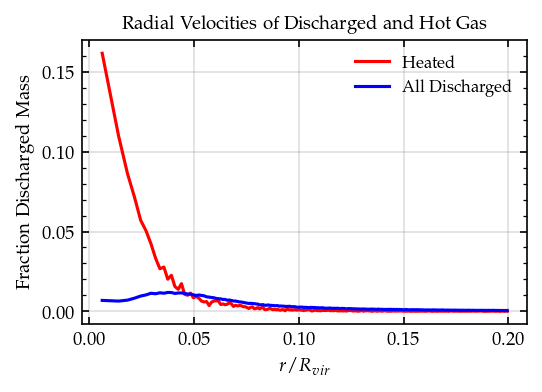

In [242]:
bincount = 300
bins = radialbins(discharged, bincount, 0.2)

### plotting heated r/Rvir alongside all discharged r/Rvir using the bining design defined above. ###
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'$r/R_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

This binning strategy appears to work much better than when using numpy's standard binning technique; we will stick with this moving forward and confirm that it is a reasonable approach to take by making the above plot from the beginning of this notebook.

We now compute the fractions of discharged particles that were SNe-heated for each bin, and plot these fractions just as was done above for 'mass fractions.'

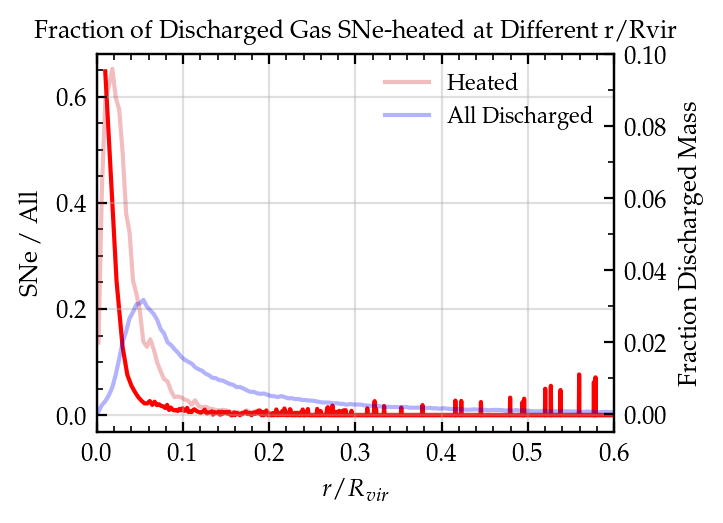

In [229]:
bincount = 1000
bins = radialbins(discharged, bincount,0.6)
bincenters = 0.5*(bins[1:] + bins[:-1])


# assigning particles in each set to equal sets of bins.
_all, x = np.histogram(all_rR, bins=bins)

_hot, x = np.histogram(hot_rR, bins=bins)

# computing fraction hot/all for each bin.
sne_ratio = np.array([])

for i in range(0, bincount-1):
    ratio = _hot[i]/_all[i]
    sne_ratio = np.append(sne_ratio, ratio)
    i += 1
    



### plotting fractions hot/all at different r/Rvir. ###
fig, ax1 = plt.subplots(1,1,dpi=200, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# fraction sne/all.
ax1.plot(bincenters, sne_ratio, label='SNe/All', c='r', zorder=-1000)

ax1.set_xlabel(r'$r/R_{vir}$')
ax1.set_ylabel('SNe / All')
ax1.tick_params(axis ='y') 


# original sne, all distributions; adding twin axes to plot.
ax2 = ax1.twinx()

bins=150
y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='Heated', c='tab:red', alpha=0.3, zorder = -1)

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='All Discharged', c='b', alpha=0.3, zorder=-1)


ax2.set_ylabel('Fraction Discharged Mass')  
ax2.tick_params(axis ='y') 


# labels, axis scaling, etc.
ax2.legend(frameon=False, fontsize='8')

ax1.set_title('Fraction of Discharged Gas SNe-heated at Different r/Rvir', fontsize='medium')
ax1.set_xlim(0,0.6)
# ax1.set_ylim(-0.1,0.7)
ax2.set_ylim(-0.005,0.1)


ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax1.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax1.tick_params(direction='in',which='both',right=True,top=True)
ax1.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

We calculate the same plot given above in the proceeding to compare the dynamic vs standard histogram binning. Evidently, the dynamic version would appear more useful.

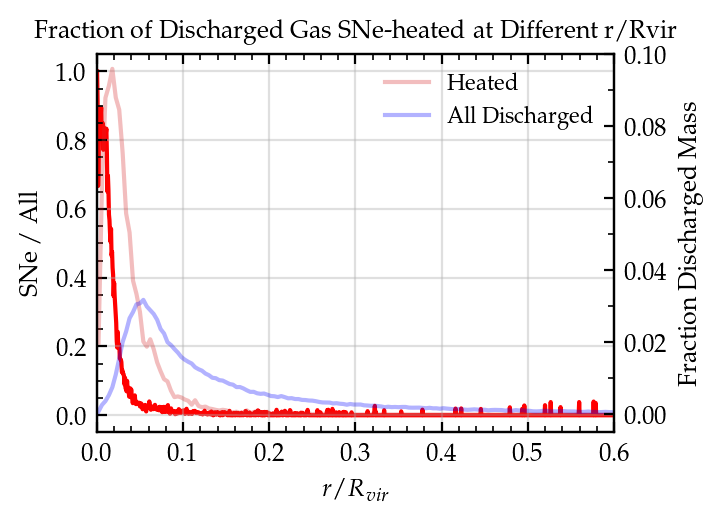

In [248]:
bincount = 1000
bins = radialbins(discharged, bincount,0.6)
bincenters = 0.5*(bins[1:] + bins[:-1])


# assigning particles in each set to equal sets of bins.
_all, x = np.histogram(all_rR, bins=bincount, range=(0,0.6))

_hot, x = np.histogram(hot_rR, bins=bincount, range=(0,0.6))

# computing fraction hot/all for each bin.
sne_ratio = np.array([])

for i in range(0, bincount):
    ratio = _hot[i]/_all[i]
    sne_ratio = np.append(sne_ratio, ratio)
    i += 1
    



### plotting fractions hot/all at different r/Rvir. ###
fig, ax1 = plt.subplots(1,1,dpi=200, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# fraction sne/all.
bincenters = 0.5*(x[1:] + x[:-1])
ax1.plot(bincenters, sne_ratio, label='SNe/All', c='r', zorder=-1000)

ax1.set_xlabel(r'$r/R_{vir}$')
ax1.set_ylabel('SNe / All')
ax1.tick_params(axis ='y') 


# original sne, all distributions; adding twin axes to plot.
ax2 = ax1.twinx()

bins=150
y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='Heated', c='tab:red', alpha=0.3, zorder = -1)

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='All Discharged', c='b', alpha=0.3, zorder=-1)


ax2.set_ylabel('Fraction Discharged Mass')  
ax2.tick_params(axis ='y') 


# labels, axis scaling, etc.
ax2.legend(frameon=False, fontsize='8')

ax1.set_title('Fraction of Discharged Gas SNe-heated at Different r/Rvir', fontsize='medium')
ax1.set_xlim(0,0.6)
# ax1.set_ylim(-0.1,0.7)
ax2.set_ylim(-0.005,0.1)


ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax1.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax1.tick_params(direction='in',which='both',right=True,top=True)
ax1.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')



### Fraction Ram Pressure-stripped per $r/R_{vir}$ <a class="anchor" id="fractionram"></a>



In [230]:
# later when there is time.

## Accretion of Discharged Gas <a class="anchor" id="accretion"></a>

Answering the question of what fraction of discharged gas returns to its respective satellite galaxy's disk after expulsion. Furthermore, however, we determine what fraction of sne heated gas indeed returns to the disk.

Of course, our study here hinges on many dependencies: For one, results here depend entirely on how we count gas particle accretion. In the first stage of the analysis here, we simply look at the timestep* after a particle has been discharaged; if it has returned to its satellite's disk in the timestep after discharge, then we count it as being accreted. 

Analysis to be performed later on will require looking at all timesteps (or some yet to be defined 'sufficient number') to determine if the particle is ever accreted, since the original approach ignores the potential for accretion more than one timestep after discharge.

Let us start out simply by finding the ratio 
$$
    \frac{\# \ accreted}{\# \ discharged}
$$
where we only count unique accretion and discharge events (any particle that is repeatedly discharged and accreted is only counted once).

--

*Note that each step in time is defined to be 1 Gigayear.


In [281]:
# pulling out a subset of 'discharged' containing those discharged particles with pids that match the pids of those
# in 'accreted'; calling it 'accdis'; the masking technique.

# Ids of preheated
x = np.array(discharged['pid'])
# Ids of discharged, SNe heated gas
y = np.array(accreted['pid'])

index = np.argsort(x)
sorted_x = x[index] # Sorted list of ids pre discharged                        
sorted_index = np.searchsorted(sorted_x, y)
yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y
result = np.ma.array(yindex, mask=mask)
accdis = discharged.iloc[result[~result.mask].data]

In [318]:
# looking for unique pids so that we don't doublecount particles that are discharged and accreted several times.

# ...for unique accreted...
m = np.zeros_like(accreted.pid, dtype=bool)
m[np.unique(accreted.pid, return_index=True)[1]] = True
acc_unique = accreted.pid[~m]

# ...for unique discharged...
m = np.zeros_like(discharged.pid, dtype=bool)
m[np.unique(discharged.pid, return_index=True)[1]] = True
dis_unique = discharged.pid[~m]

# computing percent accretion:
print('According to the simulation data here collected,', "%.2f" % round(100 * len(acc_unique)/len(dis_unique),2),\
      'percent of uniquely discharged particles are accreted back \n onto their respective satellite\'s halo/disk...' )

print('\n while', "%.2f" % round(100 * len(accreted)/len(discharged),2),\
      'percent of all discharged particles are accreted.' )

According to the simulation data here collected, 79.37 percent of uniquely discharged particles are accreted back 
 onto their respective satellite's halo/disk...

 while 80.50 percent of all discharged particles are accreted.


In [321]:
# pulling out a subset of 'accreted' containing particles that were SNe-heated when discharged.

# Ids of preheated
x = np.array(accreted['pid'])
# Ids of discharged, SNe heated gas
y = np.array(heated['pid'])

index = np.argsort(x)
sorted_x = x[index] # Sorted list of ids pre discharged                        
sorted_index = np.searchsorted(sorted_x, y)
yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y
result = np.ma.array(yindex, mask=mask)
accheated = accreted.iloc[result[~result.mask].data]

In [338]:
s = np.sort(heated.pid, axis=None)
x = s[:-1][s[1:] == s[:-1]]

s = np.sort(accheated.pid, axis=None)
y = s[:-1][s[1:] == s[:-1]]

len(x),len(y)

(269, 269)

In [341]:
# what about for heated particles?

# ...for unique accreted...
m = np.zeros_like(accheated.pid, dtype=bool)
m[np.unique(accheated.pid, return_index=True)[1]] = True
acc_unique = accheated.pid[~m]

# ...for unique heated...
m = np.zeros_like(heated.pid, dtype=bool)
m[np.unique(heated.pid, return_index=True)[1]] = True
hot_unique = heated.pid[~m]

# computing percent accretion:
print('In the case of SNe-heated gas,', "%.2f" % round(100 * len(acc_unique)/len(hot_unique),2),\
      'percent of uniquely discharged particles are accreted...' )

print('\n while', "%.2f" % round(100 * len(accheated)/len(heated),2),\
      'percent of all heated particles are accreted.' )

In the case of SNe-heated gas, 100.00 percent of uniquely discharged particles are accreted...

 while 91.45 percent of all heated particles are accreted.


The first result above is a bit fishy; perhaps there is something going wrong in the way we are screening pids. **Look into this!!**

--

Let us now consider accretion rates for gas at different $r/R_{vir}$ distances:

## Code Testing <a class="anchor" id="proving"></a>

Testing out different data types and computations.

In [12]:
heated.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'angle', 'key', 'weight'],
      dtype='object')

In [15]:
heated[heated.key =='h148_13']

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,host_r_gal,sat_disk,sat_halo,host_disk,host_halo,other_sat,IGM,angle,key,weight
131,12.150951,11100527,0.166110,7.213274e+05,19375.947033,12.173343,0.484826,0.008223,0.110528,-0.288046,...,20.529471,False,False,False,False,False,True,132.074365,h148_13,0.000091
196,7.039793,12785234,1.883412,9.293573e+04,28326.998601,7.067249,0.516366,0.011357,-0.261572,0.431688,...,21.027921,False,True,False,False,False,False,64.047083,h148_13,0.000133
252,6.905111,12793384,0.085164,1.222081e+06,31665.645124,6.928359,0.656143,0.014659,0.163661,0.620284,...,17.825822,False,False,False,False,False,True,120.198725,h148_13,0.000148
268,8.198053,12794851,0.340908,2.927524e+04,29077.386044,8.208670,1.043853,0.020372,0.288292,0.893937,...,17.746425,False,True,False,False,False,False,82.862729,h148_13,0.000136
277,10.352954,12794927,0.811883,4.846995e+05,30634.527073,10.373126,0.491615,0.009339,-0.168405,-0.276818,...,19.590469,False,False,False,False,False,True,166.315932,h148_13,0.000144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,7.039793,17420943,0.858581,2.884136e+04,27017.256894,7.043680,0.328607,0.007227,-0.117353,0.057914,...,21.027921,False,True,False,False,False,False,53.648692,h148_13,0.000127
14505,7.767072,17421083,2.162162,1.965391e+04,28330.046773,7.793685,0.100655,0.002039,0.078707,-0.057023,...,18.223338,False,True,False,False,False,False,80.432929,h148_13,0.000133
14644,6.905111,17421611,1.047711,2.002510e+04,26945.860586,6.910682,0.423128,0.009453,0.166180,-0.238317,...,17.825822,False,True,False,False,False,False,122.386956,h148_13,0.000126
14479,10.767100,17422867,0.022302,2.269590e+05,28169.260443,10.779395,1.009953,0.018774,0.862692,0.085210,...,20.143633,False,False,False,False,False,True,68.985383,h148_13,0.000132
